In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### Deklaracja funkcji obliczającej energię wiązania

In [2]:
def nucleus_energy(N, Z, D):
    
    A = N + Z
    alpha = 15.753
    beta = 17.804
    gamma = 0.7103
    epsilon = 23.69
    
    return (alpha*(A) - beta*(A**(2/3)) - gamma*(Z*(Z-1))/(A**(1/3)) - epsilon*((N-Z)**2)/A) + D

### Generacja liczb neutronów, protonów, liczby masowej i określenie parzystości liczb protonów i neutronów

In [3]:
N = np.arange(1, 180)
Z = np.arange(1, 120)
A = np.arange(2, N.max()+Z.max())
Zv, Nv = np.meshgrid(Z, N)
D = Zv%2 + Nv%2
D = np.where(D == 2, -34*(Zv + Nv)**(-3/4), D)
D = np.where(D == 0, 34*(Zv + Nv)**(-3/4), D)
D = np.where(D == 1, 0, D)

### Obliczenie ścieżek stabilności wg.:
1. K. N. Muchina
2. S. Krane

In [4]:
# K. N. Muchin
stab_path_Z = (A)/(1.98 +0.015*(A)**(2/3))
stab_path_N = A - stab_path_Z
# Krane
Zmin = (A)/(2*(1+1/4*(A)**(2/3)*0.72/23))
Nmin = A-Zmin

### Wizualizacja

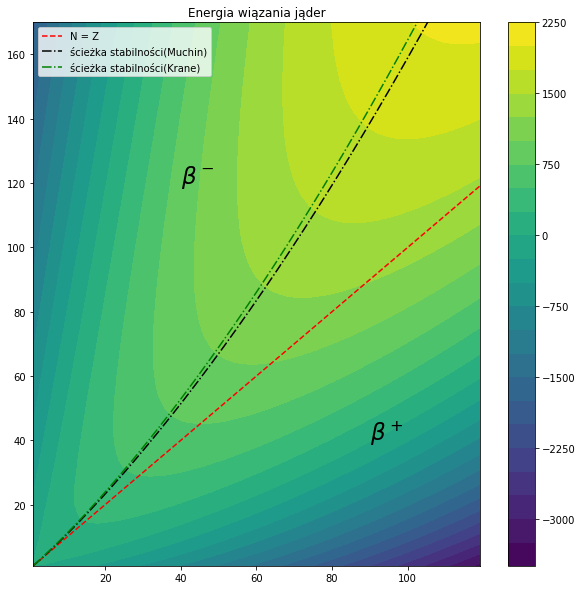

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.contourf(Z, N, nucleus_energy(Nv, Zv, D), levels=24)
fig.colorbar(c)
ax.set_title('Energia wiązania jąder')
ax.plot(N[:Z.shape[0]], Z, "--r", label='N = Z')
ax.plot(stab_path_Z, stab_path_N,  "-.k", label="ścieżka stabilności(Muchin)",)
ax.plot(Zmin, Nmin,  "-.g", label="ścieżka stabilności(Krane)",)
ax.set_xlim(left=Z.min(), right=Z.shape[0])
ax.set_ylim(top=170)
ax.text(90, 40, r"$\beta^+$", fontsize = 23)
ax.text(40, 120, r"$\beta^-$", fontsize = 23)
ax.legend()

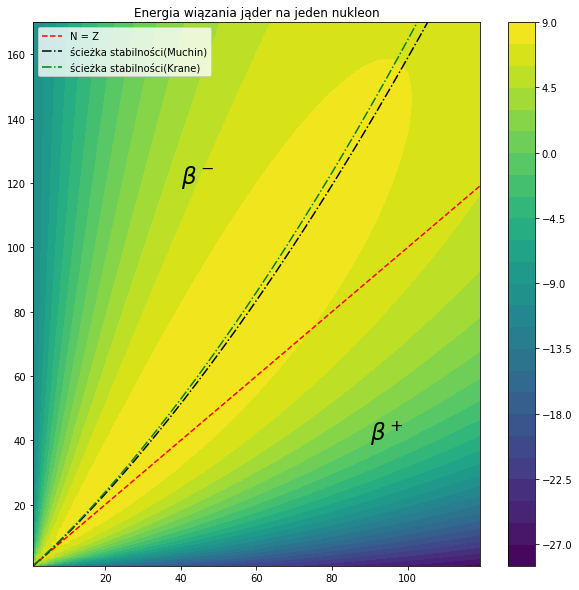

In [6]:
fig, ax = plt.subplots(figsize=(10, 10))
c = ax.contourf(Z, N, nucleus_energy(Nv, Zv, D)/(Nv+Zv), levels=24)
fig.colorbar(c)
ax.set_title('Energia wiązania jąder na jeden nukleon')
ax.plot(N[:Z.shape[0]], Z, "--r", label='N = Z')
ax.plot(stab_path_Z, stab_path_N,  "-.k", label="ścieżka stabilności(Muchin)",)
ax.plot(Zmin, Nmin,  "-.g", label="ścieżka stabilności(Krane)",)
ax.set_xlim(left=Z.min(), right=Z.shape[0])
ax.set_ylim(top=170)
ax.text(90, 40, r"$\beta^+$", fontsize = 23)
ax.text(40, 120, r"$\beta^-$", fontsize = 23)
ax.legend()

### Kalkulator energii wiązania:

In [13]:
#liczba masowa:
A1 = 239

#liczba atomowa:
Z1 = 94

#liczba neutronów:
N1 = A1 - Z1

D1 = (N1)%2 + Z1%2
if D1==2:
    D1 = -34*(Z1 + N1)**(-3/4)
elif D1==0:
    D1 = 34*(Z1 + N1)**(-3/4)
elif D1==1:
    D1 = 0
    
f"{nucleus_energy(N1, Z1, D1):4.2f} MeV"

'1820.90 MeV'